In [1]:
USE {
    repositories {
        maven("https://repsy.io/mvn/yeicor/github-public")
    }

    dependencies {
        implementation("com.github.yeicor:kraphviz:1.0.0")
    }
}

In [2]:
import org.mikrograd.diff.MLP
import org.mikrograd.diff.Value
import org.mikrograd.diff.minus

In [3]:
val wh = Value(0.25, label = "wh")
val wo = Value(0.4, label = "wo")

val x = Value(2.0, label = "x")
val y = Value(4.5, label = "y")
val zh = x * wh
zh.label = "zh"
val h = zh.relu()
h.label = "h"
val zo = h * wo
zo.label = "zo"
val o = zo.relu()
o.label = "o"
val loss = ((y - o).pow(2.0)) / 2
loss.label = "loss"
loss.backward()

In [4]:
loss

Value(data=9.245, grad=1.0, op=*, label='loss')

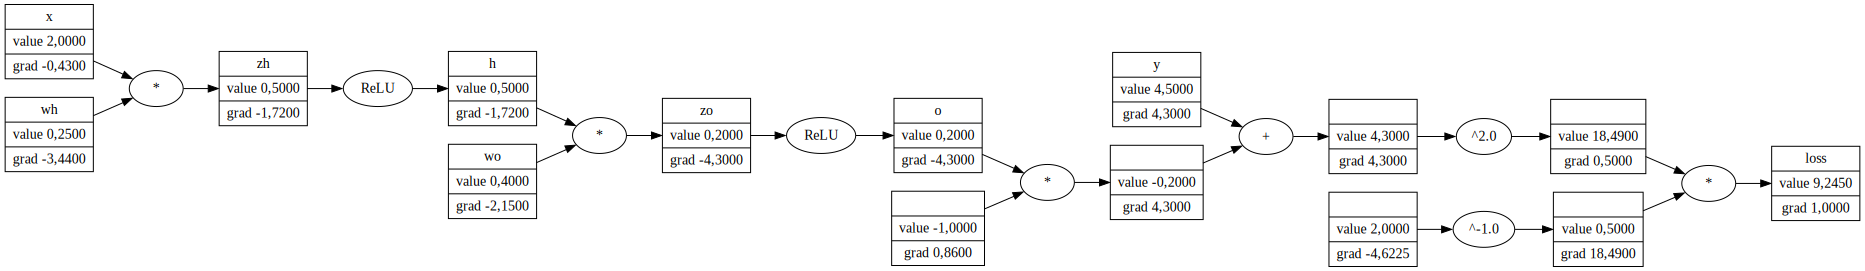

In [5]:
import java.io.File
import org.mikrograd.utils.drawDot

val dotStr = drawDot(loss, withGradient = true).render()

val svg = com.github.yeicor.kraphviz.Kraphviz().render(dotStr)
File("mlp_1_1_1.svg").writeText(svg)
MIME("image/svg+xml" to svg)